In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(features, kmax):
    sse = []
    sil = []
    db = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k ).fit(features)
        labels = kmeans.labels_
        cur_sil = silhouette_score(features, labels, metric = 'euclidean')
        sil.append(cur_sil)
        sse.append(kmeans.inertia_)
        db.append(davies_bouldin_score(features, labels))
    return sse, sil, db

df = pd.read_csv('dataset/datasetcleaned.csv.zip')
sse, sil, db = calculate_WSS(df, 10)

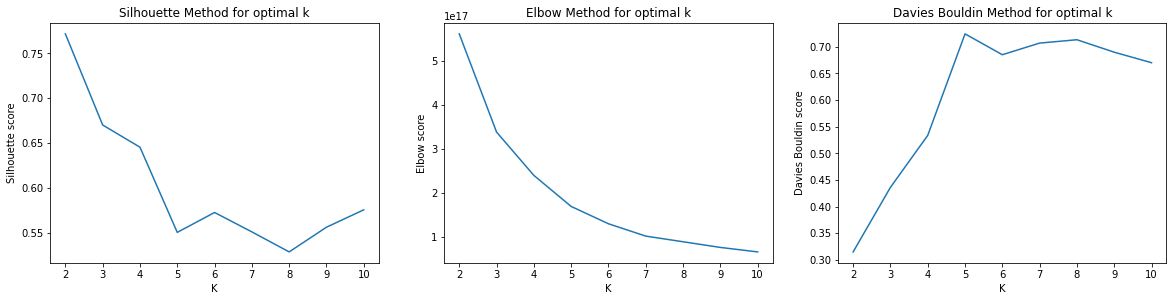

In [33]:
x = [i for i in range(2,11)]
plt.figure(figsize=(20, 15))

   
axs = plt.subplot(3,3,1)
axs.set_title('Silhouette Method for optimal k')
axs.set_xlabel('K')
axs.set_ylabel('Silhouette score')
axs.plot(x,sil)

axs = plt.subplot(3,3,2)
axs.set_title('Elbow Method for optimal k')
axs.set_xlabel('K')
axs.set_ylabel('Elbow score')
axs.plot(x,sse)

axs = plt.subplot(3,3,3)
axs.set_title('Davies Bouldin Method for optimal k')
axs.set_xlabel('K')
axs.set_ylabel('Davies Bouldin score')
axs.plot(x,db)

plt.show()